<a href="https://colab.research.google.com/github/Salwalabibah/PCVK_Genap_2023/blob/main/week11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Template matching**

menggunakan library openCV:
cv.matchTamplate(), dengan parameter


*   **Image**: citra input
*   **templ**: template yang dicari, ukurannya tidak boleh lebih besar dan citra input
*   **method**: metode dari template matching

Jenis method template matching di OpenCV:


1.   TM_SQDIFF
2.   TM_SQDIFF_NORMED
3.   TM_CCORR
4.   TM_CCORR_NORMED
5.   TM_CCOEFF
6.   TM_CCOEFF_NORMED


# **TM_SQDIFF**

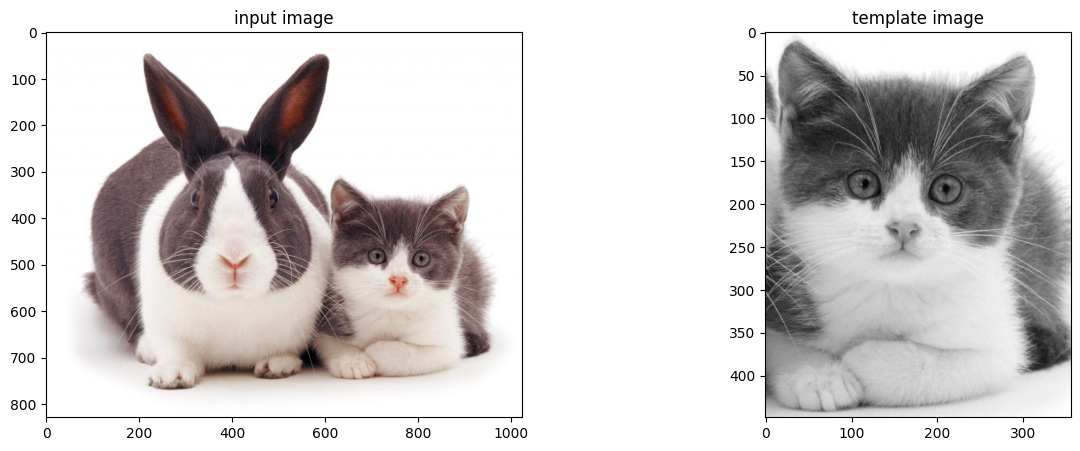

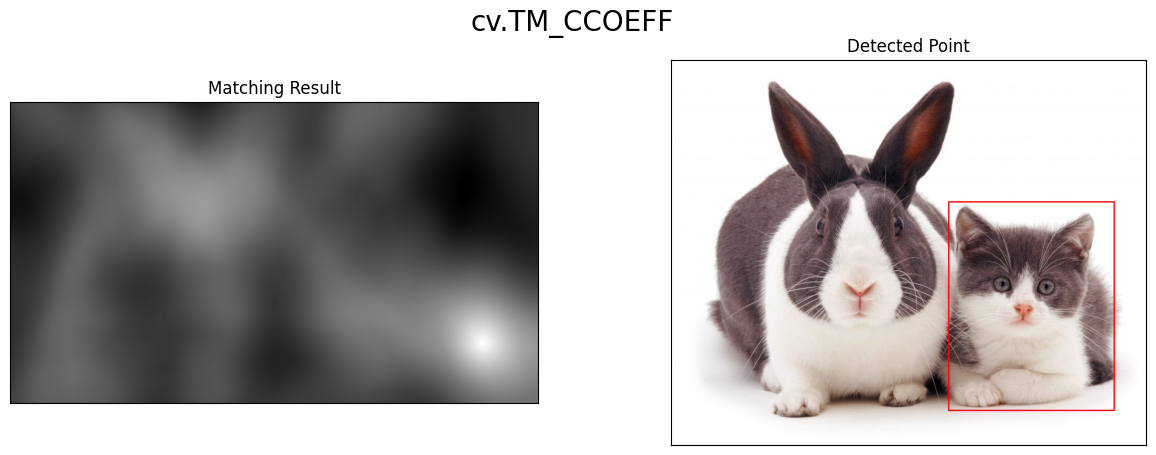

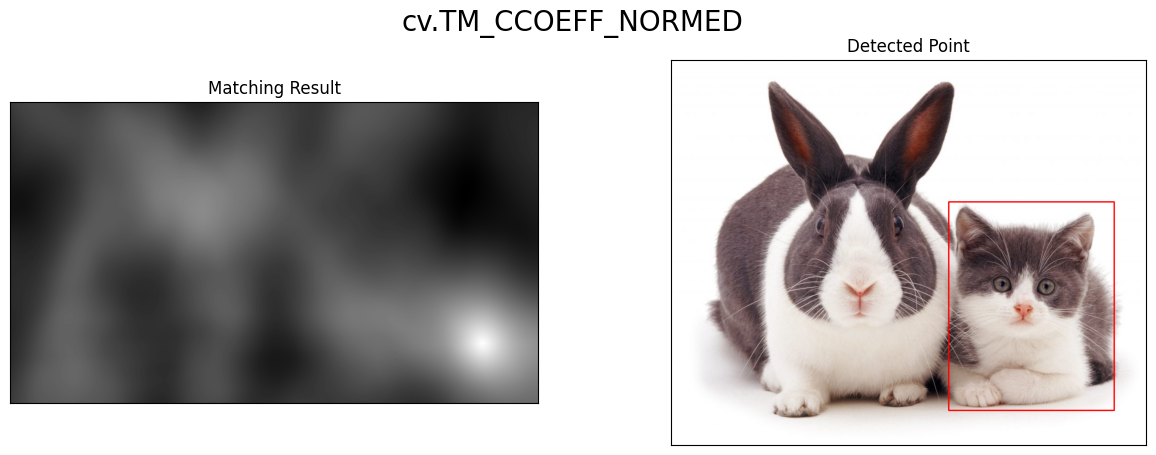

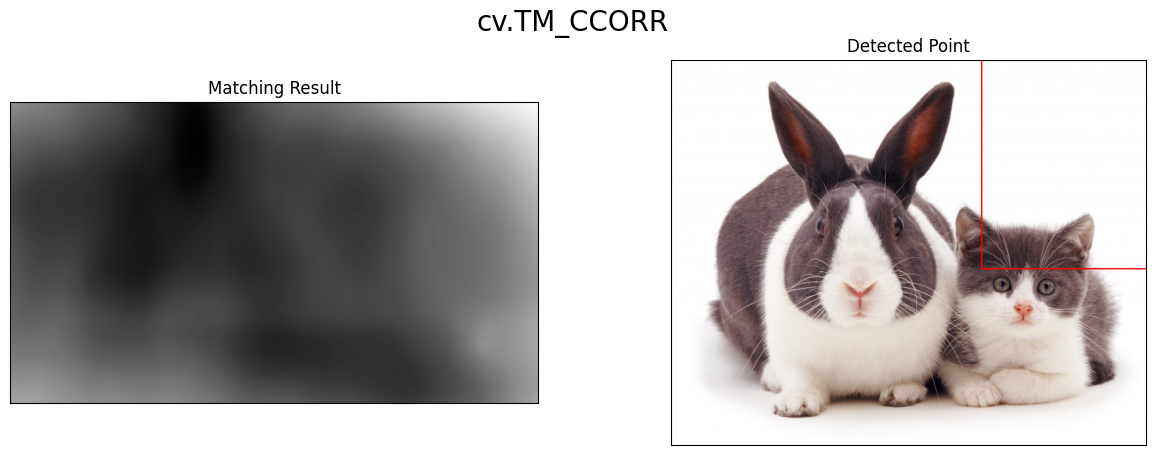

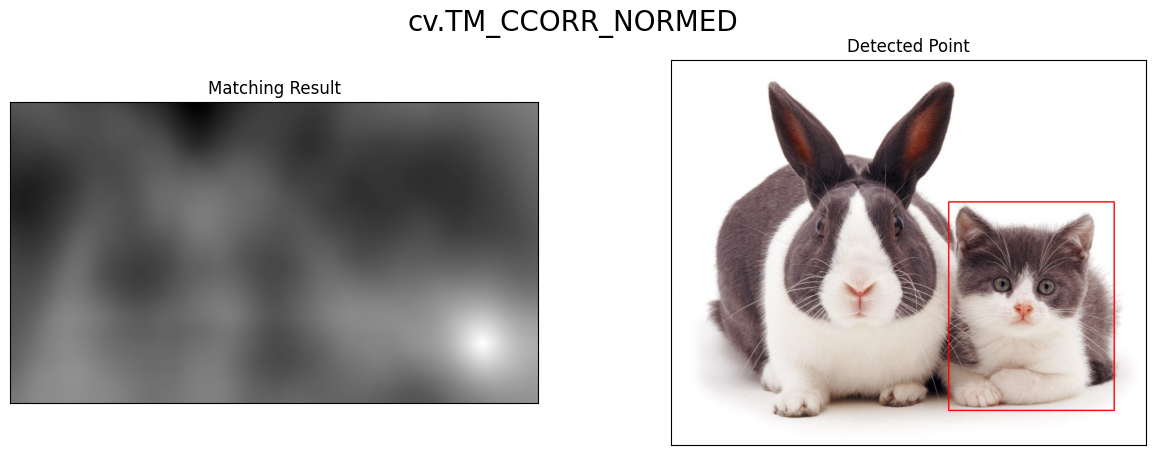

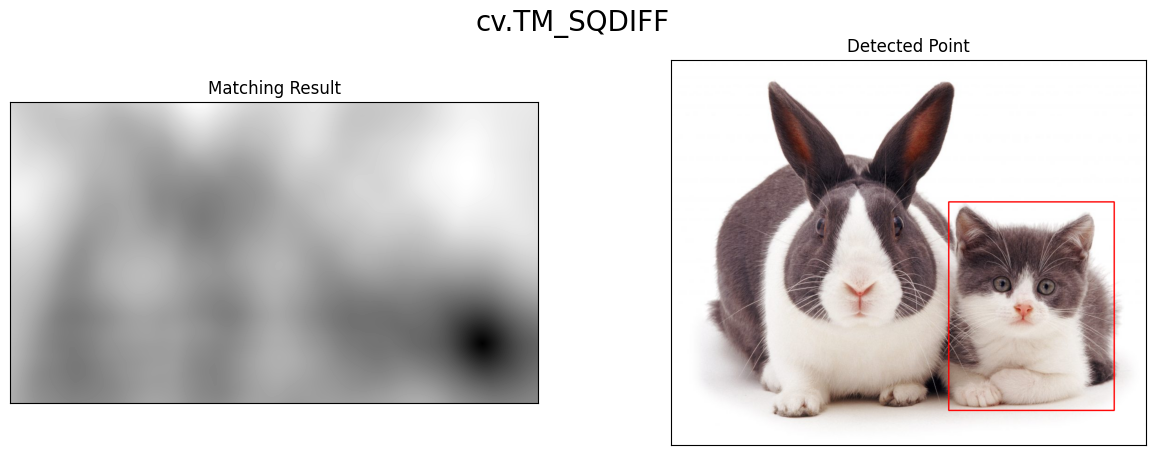

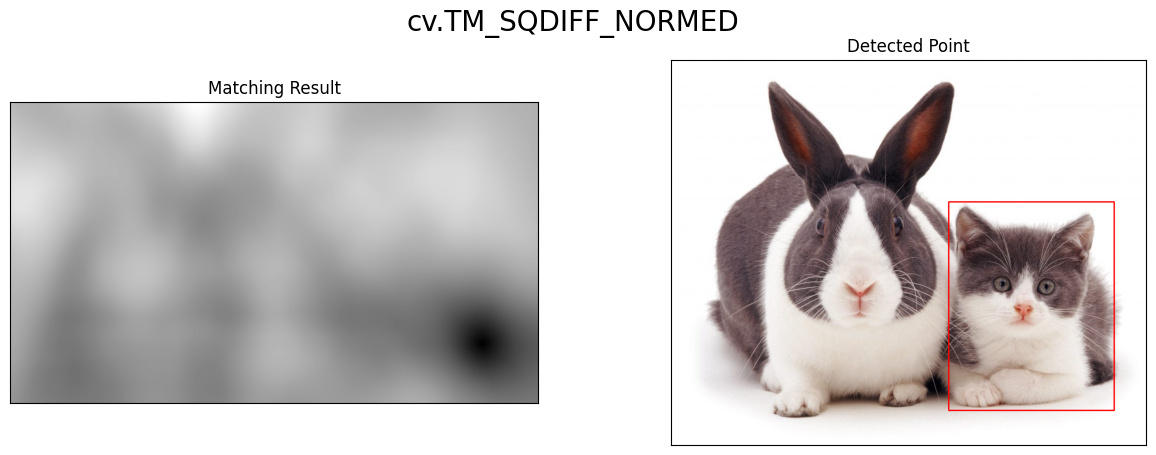

In [3]:
img = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/cats_and_bunnies.jpg')
templ = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/cat2_templatejpg.jpg', 0)
img2 = img.copy()

img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
# templ_gray = cv.cvtColor(templ, cv.COLOR_BGR2GRAY)

w, h = templ.shape[::-1]

f, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title("input image")
ax[1].imshow(cv.cvtColor(templ, cv.COLOR_BGR2RGB))
ax[1].set_title("template image")
plt.show()

methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
           'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

for meth in methods:
  img = img2.copy()
  method = eval(meth)
  # Apply template Matching
  result = cv.matchTemplate(img_gray, templ, method)
  min_val, max_val, min_loc, max_loc = cv.minMaxLoc(result)

  if method in [cv.TM_SQDIFF, cv.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc

  bottom_right = (top_left[0] + w, top_left[1] + h)

  cv.rectangle(img, top_left, bottom_right, (0, 0, 255), 2)
  plt.figure(figsize=(15,5))
  plt.subplot(121),plt.imshow(result,cmap = 'gray')
  plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
  plt.subplot(122),plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
  plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
  print("\n\n")
  plt.suptitle(meth, fontsize=20)
  plt.show()

# **3. Implementasikan konsep template matching tanpa menggunakan library OpenCV untuk multiple object,**
 menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai
berikut:


# **4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian**
Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga
menghasilkan luaran sebagai berikut:

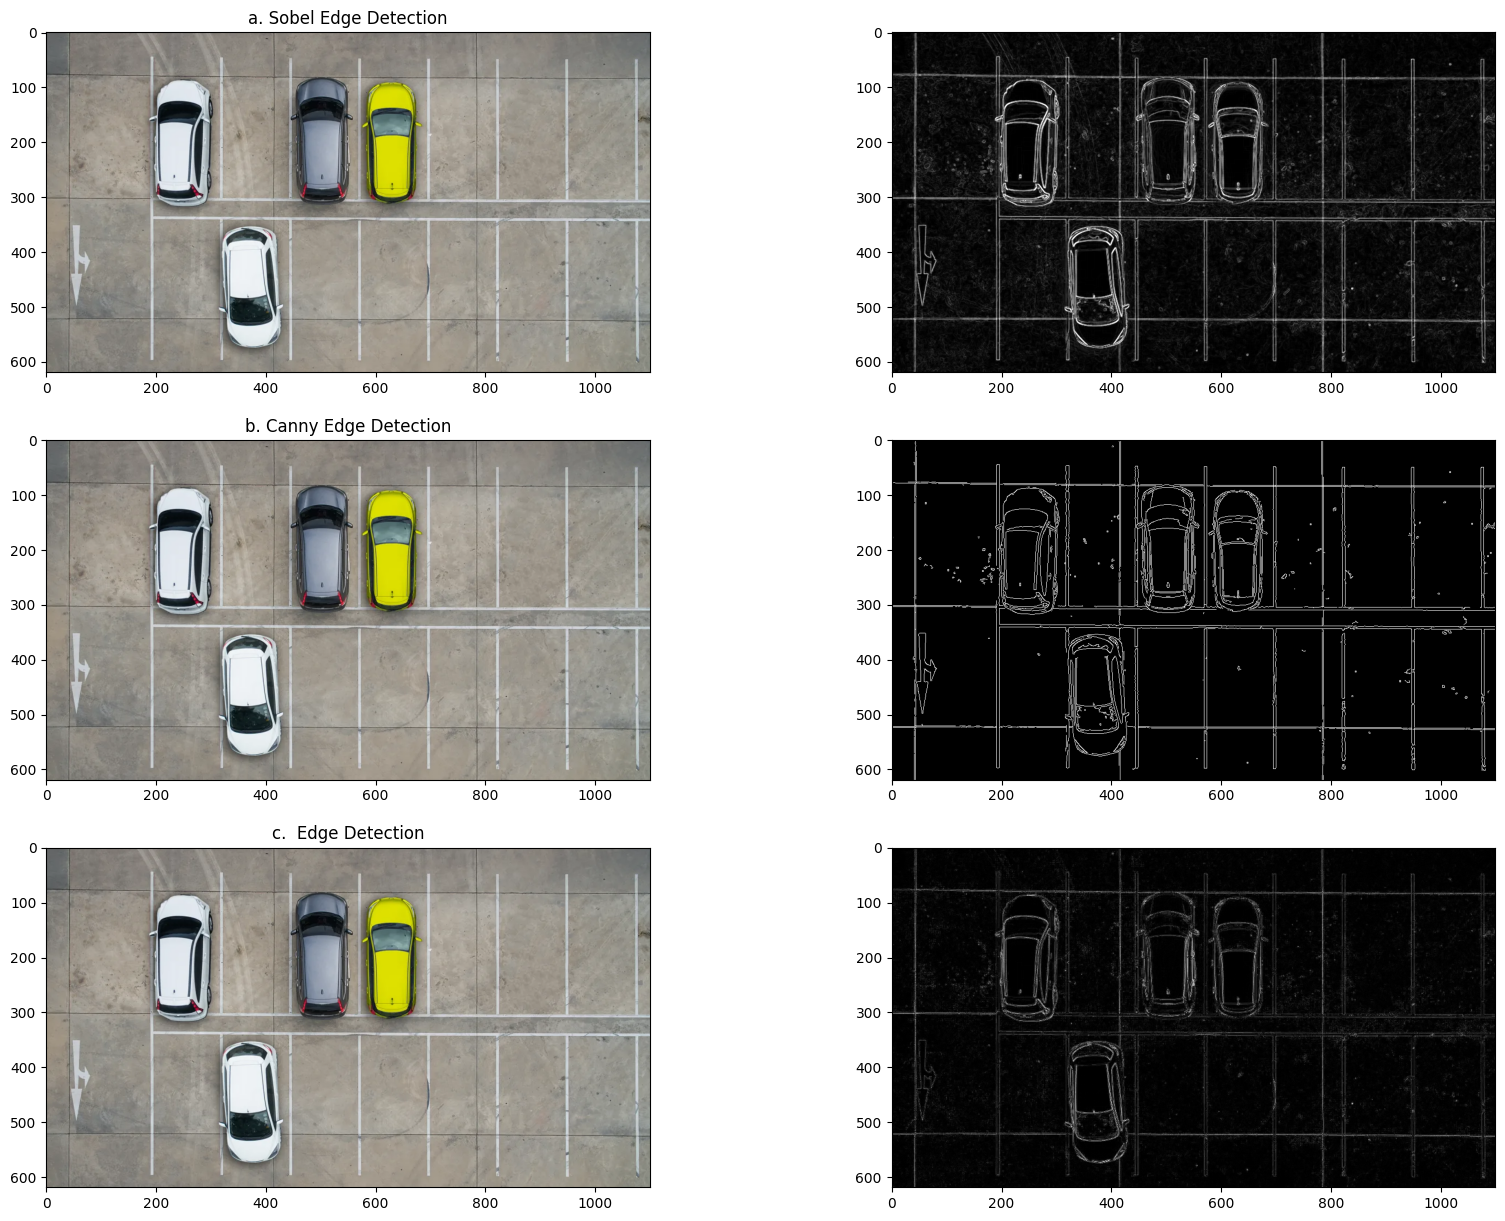

In [27]:
img4 = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/car-park.jpg')
img4_gray = cv.cvtColor(img4, cv.COLOR_BGR2GRAY)

# Sobel
sobelx = cv.Sobel(img4_gray, cv.CV_64F, 1, 0, ksize=3)
sobely = cv.Sobel(img4_gray, cv.CV_64F, 0, 1, ksize=3)
sobelxy = cv.addWeighted(cv.convertScaleAbs(sobelx), 0.5, cv.convertScaleAbs(sobely), 0.5, 0)

# Canny
edges = cv.Canny(img4_gray, 100, 200)

# Laplacian
laplacian = cv.Laplacian(img4_gray, cv.CV_64F)
laplacian = np.uint8(np.absolute(laplacian))

f, ax = plt.subplots(3, 2, figsize=(20, 15))
ax[0, 0].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('a. Sobel Edge Detection')
ax[0, 1].imshow(cv.cvtColor(sobelxy, cv.COLOR_BGR2RGB))

ax[1, 0].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
ax[1, 0].set_title('b. Canny Edge Detection')
ax[1, 1].imshow(cv.cvtColor(edges, cv.COLOR_BGR2RGB))

ax[2, 0].imshow(cv.cvtColor(img4, cv.COLOR_BGR2RGB))
ax[2, 0].set_title('c.  Edge Detection')
ax[2, 1].imshow(cv.cvtColor(laplacian, cv.COLOR_BGR2RGB))

# **5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada**
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:


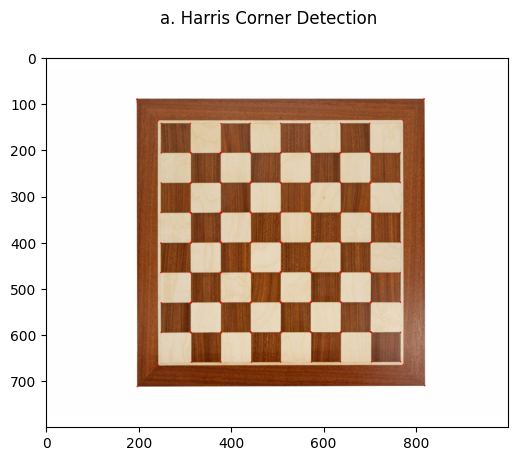

In [31]:
img5 = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/chess-board.jpg')
img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)
dst = cv.cornerHarris(img5_gray, 3, 1, 0.04)

img5_gray = np.float32(img5_gray)
result = cv.cornerHarris(img5_gray, 2, 3, 3)
result = cv.dilate(result, None)

img5[dst > 0.01 *dst.max()] = [0, 0, 255]

plt.suptitle('a. Harris Corner Detection')
plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))

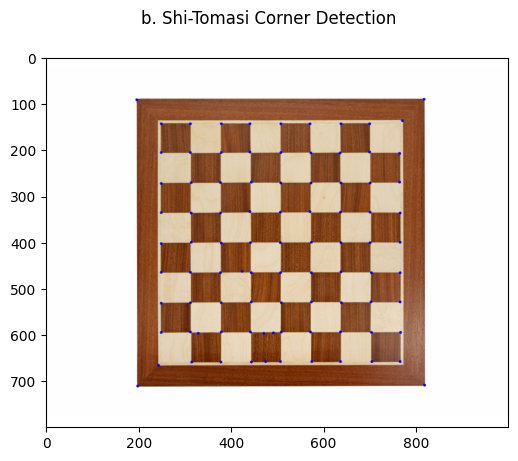

In [38]:
img5 = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/chess-board.jpg')
img5_gray = cv.cvtColor(img5, cv.COLOR_BGR2GRAY)

corners = cv.goodFeaturesToTrack(img5_gray, 100, 0.1, 10)
corners = np.int0(corners)

for corner in corners:
  x, y = corner.ravel()
  img5 = cv.circle(img5, (x, y), 3, 255, -1)

plt.suptitle('b. Shi-Tomasi Corner Detection')
plt.imshow(cv.cvtColor(img5, cv.COLOR_BGR2RGB))

# **6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan**
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan
teori, sehingga menghasilkan luaran sebagai berikut:


number of Hough lines: 33
Number of filtered lines: 1
Number of filtered lines: 2
Number of filtered lines: 3
Number of filtered lines: 4
Number of filtered lines: 5
Number of filtered lines: 6
Number of filtered lines: 7
Number of filtered lines: 8
Number of filtered lines: 9
Number of filtered lines: 10
Number of filtered lines: 11
Number of filtered lines: 12
Number of filtered lines: 13
Number of filtered lines: 14
Number of filtered lines: 14
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 15
Number of filtered lines: 16
Number of filtered lines: 16
Number of filtered lines: 17
Number of filtered lines: 17
Number of filtered lines: 18
Number of filtered lines: 18
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 19
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20
Number of filtered lines: 20


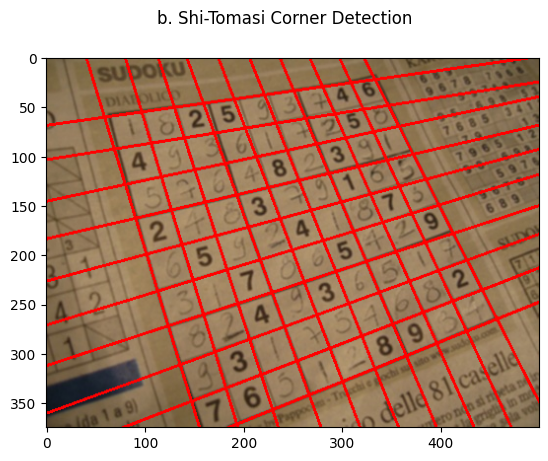

In [46]:
img6 = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/sudoku.jpg')
img6_gray = cv.cvtColor(img6, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img6_gray, 90, 150, apertureSize=3)

kernel = np.ones((3, 3), np.uint8)
edges = cv.dilate(edges, kernel, iterations = 1)

kernel = np.ones((5, 5), np.uint8)
edges = (cv.erode(edges, kernel, iterations = 1))

lines = cv.HoughLines(edges, 1, np.pi/180, threshold=150)

if not lines.any():
  print('No lines were found')
  exit()

if filter:
    rho_threshold = 15
    theta_threshold = 0.1


    similar_lines = {i : [] for i in range(len(lines))}
    for i in range(len(lines)):
      for j in range (len (lines)):
        if i == j:
            continue

        rho_i, theta_i = lines[i][0]
        rho_j, theta_j = lines[j][0]
        if abs(rho_i - rho_j) < rho_threshold and abs (theta_i - theta_j) < theta_threshold:
            similar_lines[i].append(j)

    indices = [i for i in range(len(lines))]
    indices.sort(key=lambda x: len(similar_lines[x]))

    line_flags = len(lines) *[True]
    for i in range(len(lines) - 1):
        if not line_flags [indices[i]]:
            continue

        for j in range(i + 1, len(lines)):
            if not line_flags[indices[j]]:
                continue
            rho_i, theta_i = lines[indices[i]][0]
            rho_j, theta_j = lines[indices[j]][0]
            if abs(rho_i - rho_j) < rho_threshold and abs(theta_i - theta_j) < theta_threshold:
                line_flags [indices[j]] = False
    print('number of Hough lines:', len(lines))

    filtered_lines = []

    if filter:
        for i in range(len(lines)):
            if line_flags[i]:
                filtered_lines.append(lines[i])

            print('Number of filtered lines:', len(filtered_lines ))
    else:
        filtered_lines = lines

    for line in filtered_lines:
        rho, theta = line [0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a*rho
        y0 = b*rho
        x1 = int(x0 + 1000*(-b))
        y1 = int(y0 + 1000*(a))
        x2 = int(x0 - 1000*(-b))
        y2 = int(y0 - 1000*(a))

        cv.line(img6, (x1, y1), (x2,y2),(0,0,255),2)

plt.suptitle('b. Shi-Tomasi Corner Detection')
plt.imshow(cv.cvtColor(img6, cv.COLOR_BGR2RGB))

# **7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan**
menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

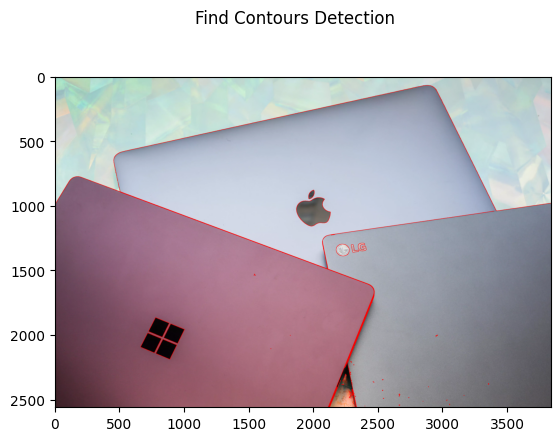

In [53]:
img7 = cv.imread('/content/drive/MyDrive/PCVK/img/Image Detection/laptop.jpg')
img7_gray = cv.cvtColor(img7, cv.COLOR_BGR2GRAY)

edges = cv.Canny(img7_gray, 50, 150, apertureSize=3)

contours, hierarchy = cv.findContours(edges, cv.RETR_EXTERNAL,
                                     cv.CHAIN_APPROX_SIMPLE)
contours_img = img7.copy()
cv.drawContours(contours_img, contours, -1, (0, 0, 255), 2)

plt.suptitle('Find Contours Detection')
plt.imshow(cv.cvtColor(contours_img, cv.COLOR_BGR2RGB))

# **E. Pengayaan Materi KTP**

1. Siapkan file dataset, contoh pada praktik ini menggunakan Maftuchin Tuban

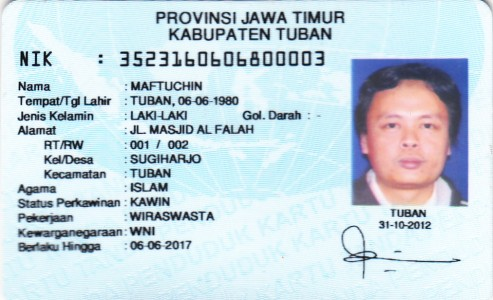

In [56]:
img_ktp = cv.imread('/content/drive/MyDrive/PCVK/img/KTP_More/ktp3.png')
cv2_imshow(img_ktp)

2. Muat 2 library berikut sebagai tahapan persiapan

In [57]:
import cv2 as cv
import os

3. Tambahkan kode lokalisasi dataset dan lakukan pembacaan file name di dalam direktori
dataset tersebut

In [66]:
path_plate = "/content/drive/MyDrive/PCVK/img/KTP_More"

file_names = []
# Looping file direktori
for name_file in sorted(os.listdir(path_plate)):
  src = cv.imread(os.path.join(path_plate, name_file))
  if src is not None:
    blurred = src.copy()
    gray = blurred.copy()
  file_names.append(name_file)

4. Masih pada looping file direktori, terapkan Gaussian Blur untuk setiap file supaya noise pickle
dapat direduksi

In [67]:
#Filtering
for i in range(10):
  blurred = cv.GaussianBlur(img_ktp, (5, 5), 0.5)

5. Lakukan konversi grayscale untuk setiap hasil citra yang tereduksi noise dan lanjutkan dengan
binerisasi citra (thresholding)


168.0 (300, 493)


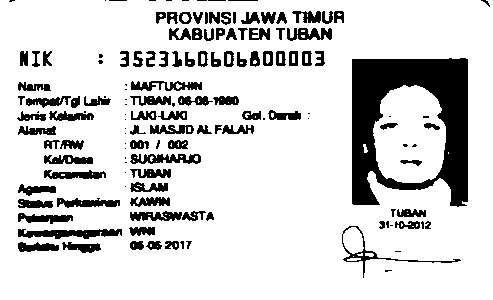

In [68]:
# Ubah ke Grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
print(ret, bw.shape)

cv2_imshow(bw)

6. Terapkan morfologi untuk setiap citra yang telah mengalami binerisasi supaya setiap karakter
atau obyek tidak berhimpitan.

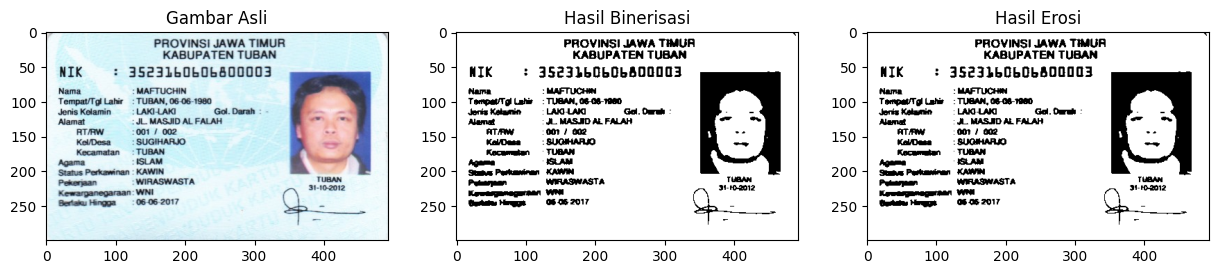

In [70]:
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

morf = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

f, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB))
ax[0].set_title("Gambar Asli")
ax[1].imshow(bw, cmap='gray')
ax[1].set_title('Hasil Binerisasi')
ax[2].imshow(morf, cmap='gray')
ax[2].set_title('Hasil Erosi')
plt.show()

7. Terapkan ekstraksi kontur untuk untuk mendapatkan semua kontur setiap karakter/obyek.
Kontur harus diseleksi berdasarkan ukuran dan rasio sebuah karakter. Karakter/obyek di
dalam KTP ini bervariasi ukuran dan rasionya, sehingga setiap karakter/obyek perlu
penanganan yang berbeda. Contoh pada praktik ini berfokus pada karakter yang seukuran
dengan NIK. Jika hasil ekstraksi kontur memperlihatkan hasil lain yaitu karakter lain
terdeteksi, hal tersebut wajar karena perlu optimize code dan preprocessing yang lebih baik
(karena hasil akuisisi setiap citra dapat berbeda).

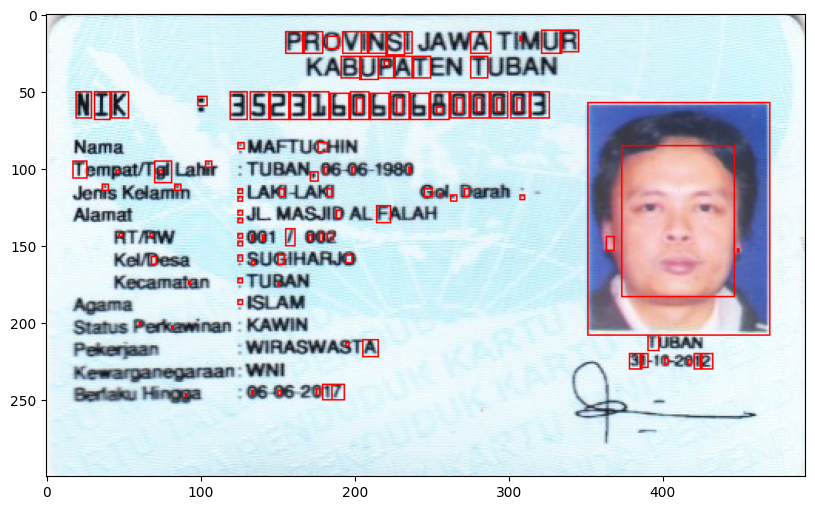

In [73]:
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

morf = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Deteksi dan ekstraksi kontur
contours, hierarchy = cv.findContours(morf.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

for contour in contours:
    x, y, w, h = cv.boundingRect(contour)
    ras = format(w / h, '.2f')
    if h >= 4 and w >= 1 and float(ras) <=1:
      cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 2 and w >= 1 and float(ras) <= 1:
      cv.rectangle(img_ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Tampilkan citra asli dan kontur yang terdeteksi
plt.figure(figsize=(12, 6))
plt.imshow(cv.cvtColor(img_ktp, cv.COLOR_BGR2RGB))

# **F. Tugas Praktikum**
Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP
untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing
yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah. Pengerjaan dilakukan
secara berkelompok dengan aturan sebagai berikut:

Kelompok 5 – KTP Widiarso Bekasi

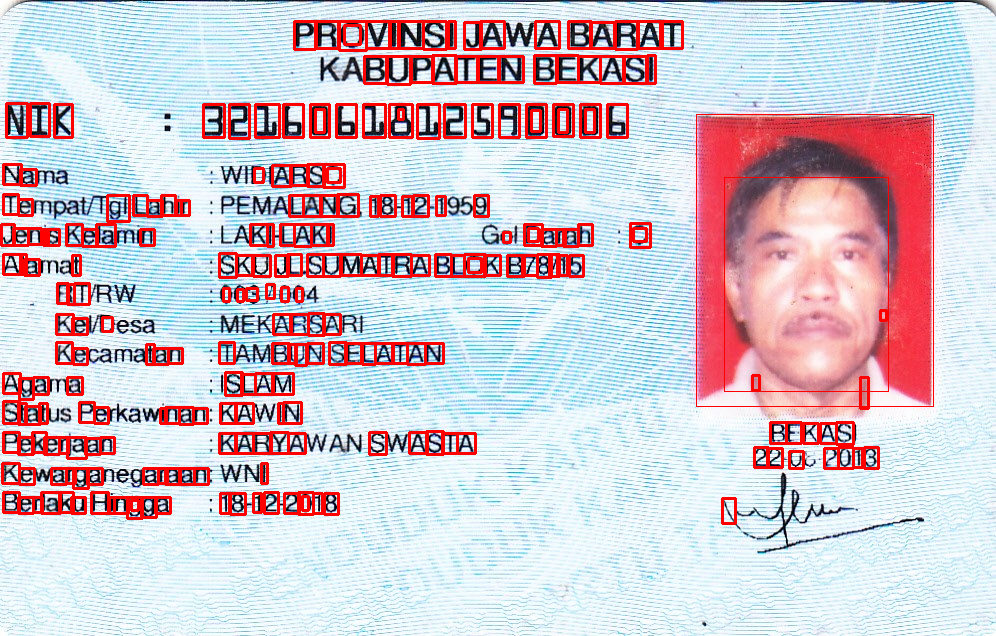

In [74]:
from google.colab.patches import cv2_imshow

ktp = cv.imread("/content/drive/MyDrive/PCVK/img/KTP_More/ktp6.png")

blurred = cv.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)
# Looping contours untuk mendapatkan kontur yang sesuai
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

cv2_imshow(ktp)